In [1]:
import os
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.jet()

<Figure size 432x288 with 0 Axes>

In [2]:
from lsst.obs.lsst.lsstCamMapper import LsstCamMapper
mapper = LsstCamMapper()
cam = mapper.camera

In [3]:
rnames = []
dnames = []
for det in cam:
    rname, dname = det.getName().split('_')
    if not rname in rnames:
        if not rname in ["R00", "R04", "R40", "R44"]:
            if not len(rname)>3:
                rnames.append(rname)
    if not dname in dnames:
        if "SG" in dname or "SW" in dname:   # ignore CR
            continue
        dnames.append(dname)
print('%d science rafts found'%len(rnames))
print('each rafts has %d CCDs'%len(dnames))

21 science rafts found
each rafts has 9 CCDs


In [4]:
def get_m5all(f):
    '''
    f is filter, can be u,g,r,i,z,y
    '''
    m5all = []
    for rname in rnames:
        m5dfFile = 'm5_output/%s/m5df_%s.csv'%(rname,rname)
        if os.path.isfile(m5dfFile):
            #print('found data for raft %s'%rname)
            df = pd.read_csv(m5dfFile, index_col=0, dtype=object)
            for dname in dnames:
                key = rname+'_'+dname
                res = df[key].apply(literal_eval)[f]
                for res1 in res:
                    m5all.append(res1)
    print('%s band, found %.0f rafts'%(f, len(m5all)/16/9))
    return m5all

In [5]:
m5design = np.array([23.9, 25.0, 24.7, 24.0, 23.3, 22.1])
m5min = np.array([23.4, 24.6, 24.3, 23.6, 22.9, 21.7])
m52019 = np.array([23.74, 24.82, 24.37, 23.94, 23.36, 22.45])

u band, found 6 rafts
g band, found 6 rafts
r band, found 6 rafts
i band, found 6 rafts
z band, found 6 rafts
y band, found 6 rafts


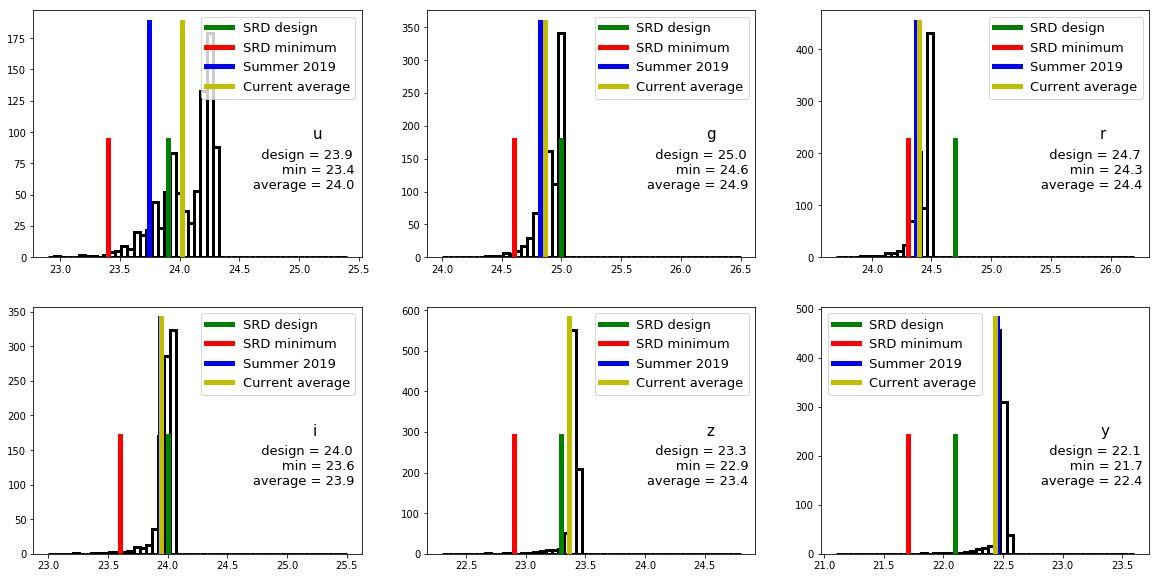

In [6]:
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
fig, ax = plt.subplots(2,3,figsize=(20,5*2))

for i,f in enumerate(filterlist):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    m5 = get_m5all(f)
    binlow = m5design[i]-1
    binhigh = binlow+2.5
    bins = np.linspace(binlow, binhigh,50)
    ax[irow][icol].hist(m5, bins, fill=False, linewidth=3)
    (y1, y2) = (ax[irow][icol].get_ylim())
    ax[irow][icol].plot([m5design[i], m5design[i]],[y1, y2/2], linewidth=5, color='g', label='SRD design')
    ax[irow][icol].plot([m5min[i], m5min[i]],[y1, y2/2], linewidth=5, color='r', label='SRD minimum')
    ax[irow][icol].plot([m52019[i], m52019[i]],[y1, y2], linewidth=5, color='b', label='Summer 2019')
    ax[irow][icol].plot([np.mean(m5), np.mean(m5)],[y1, y2], linewidth=5, color='y', label='Current average')
    ax[irow][icol].text(0.85, 0.48, f, color = 'black', transform=ax[irow][icol].transAxes, fontsize=15)
    ax[irow][icol].text(0.67, 0.28, '  design = %.1f\n       min = %.1f\naverage = %.1f'%(m5design[i], m5min[i], np.mean(m5)), 
                        color = 'black', transform=ax[irow][icol].transAxes, fontsize=13)
    ax[irow][icol].legend(fontsize=13)

In [7]:
y2

479.85